## Chapter 2 -  End-to-End Machine Learning Project
## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# Ingest
df = pd.read_csv('housing.csv')

# For testing
display(df.head())
display(df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### EDA

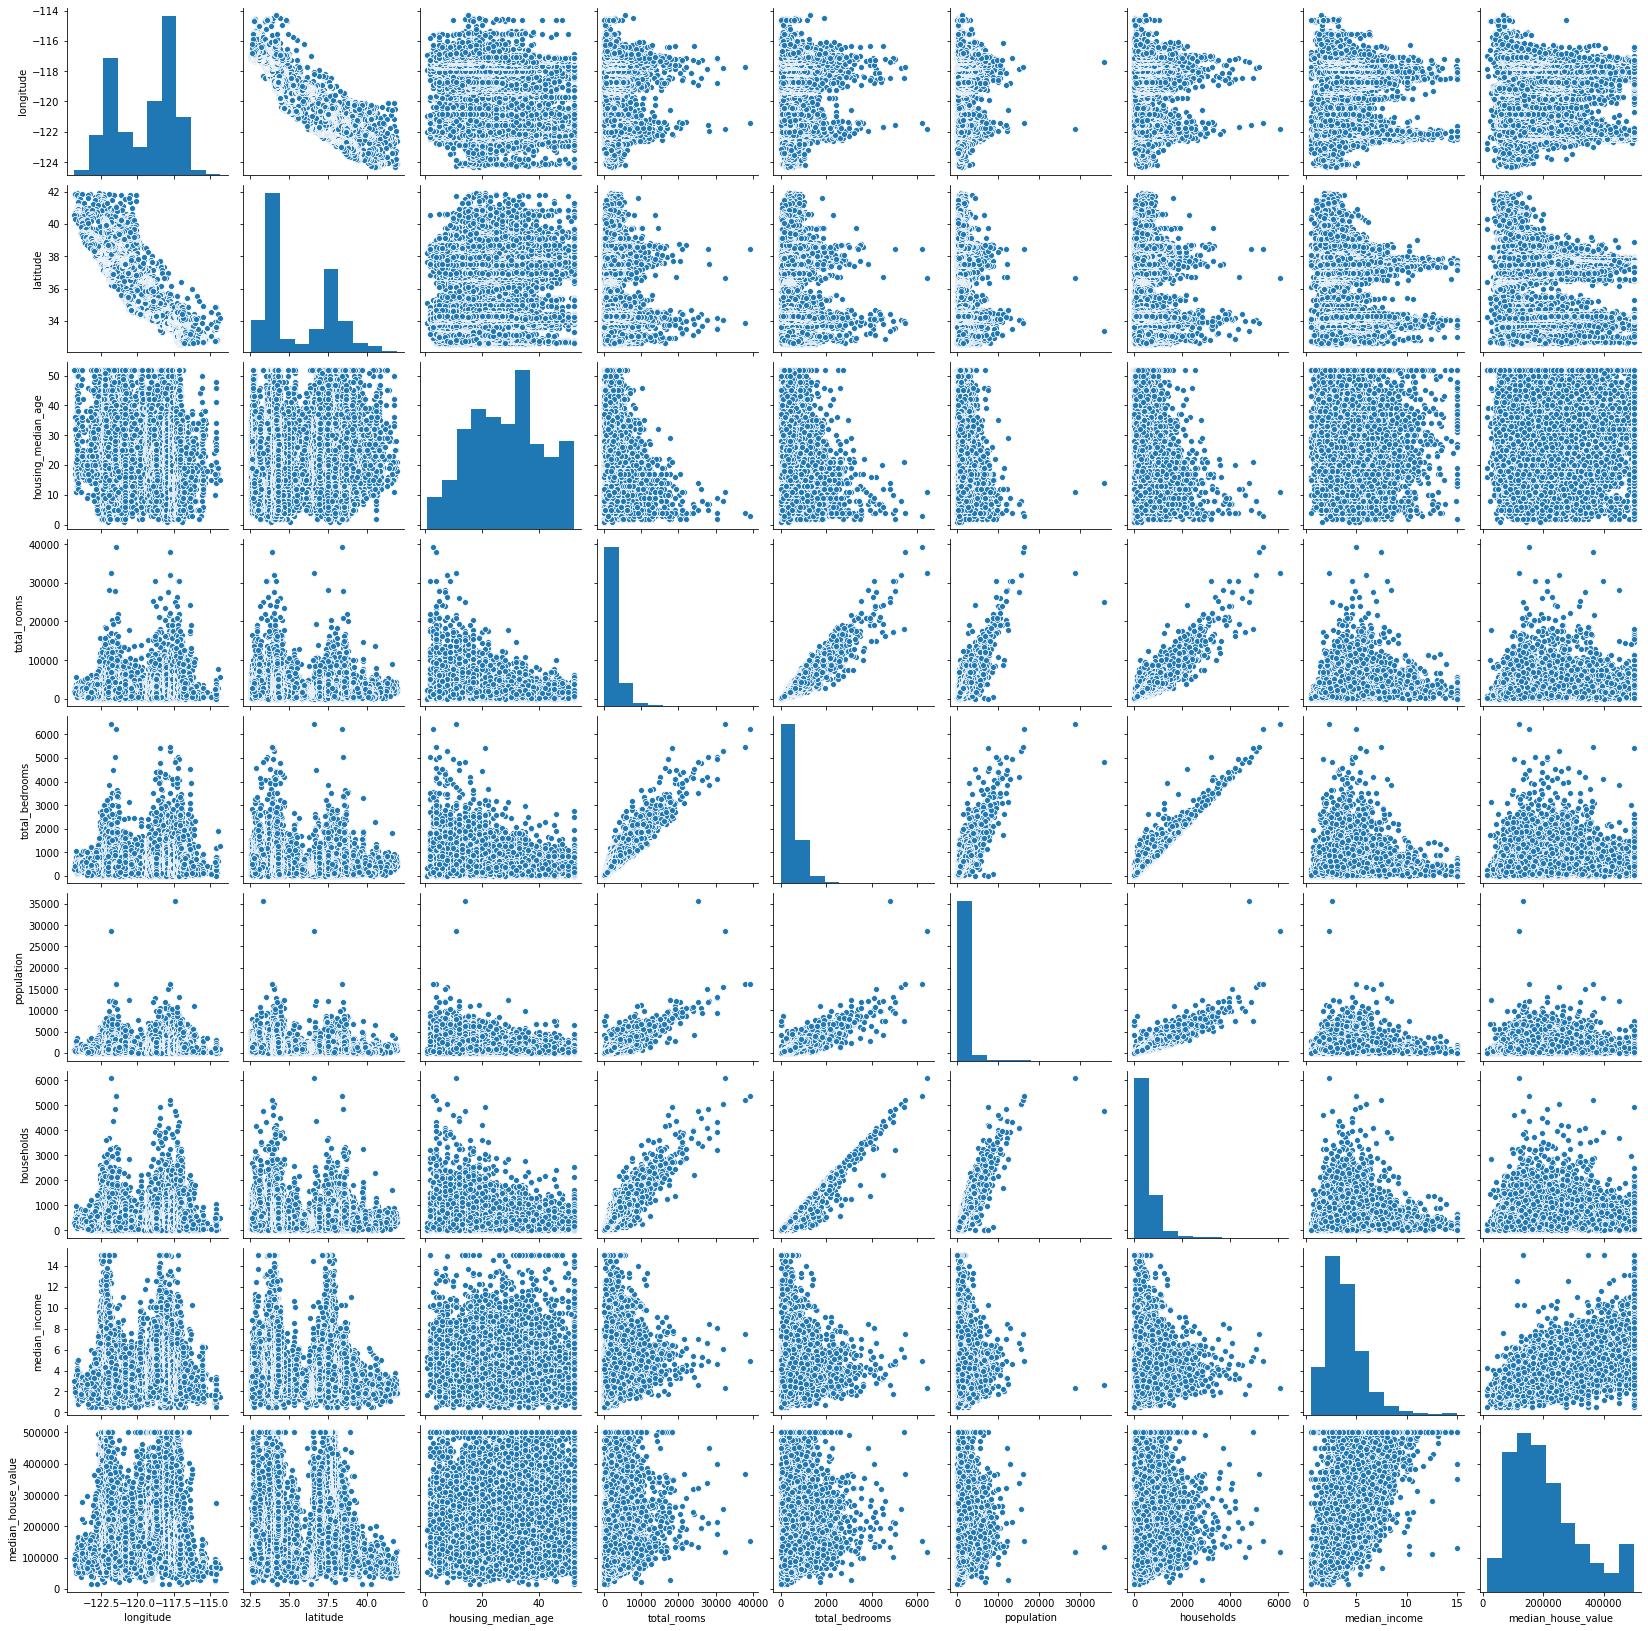

In [3]:
# See distributions & correlations of all variables
sns.pairplot(df)

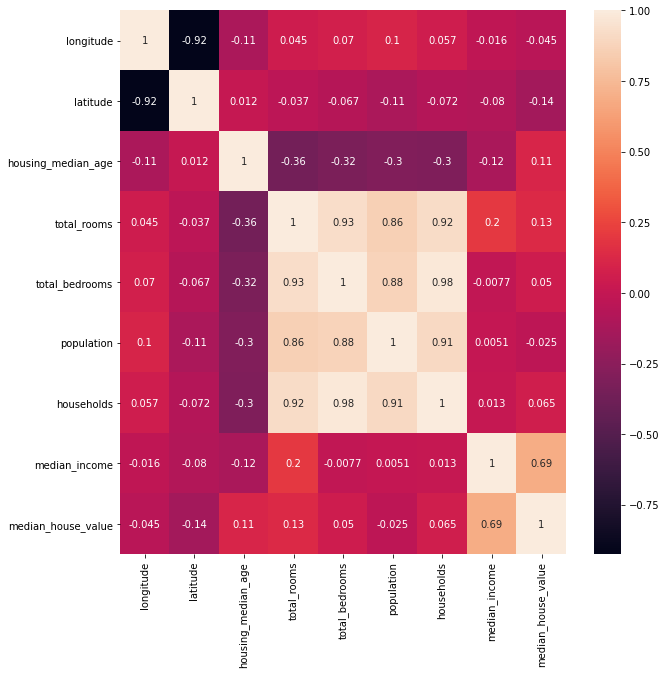

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


In [4]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.dropna(axis=0).corr(), annot=True, ax=ax)
plt.show()
# Correlation between features and target value
print(df.corr()['median_house_value'])

/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


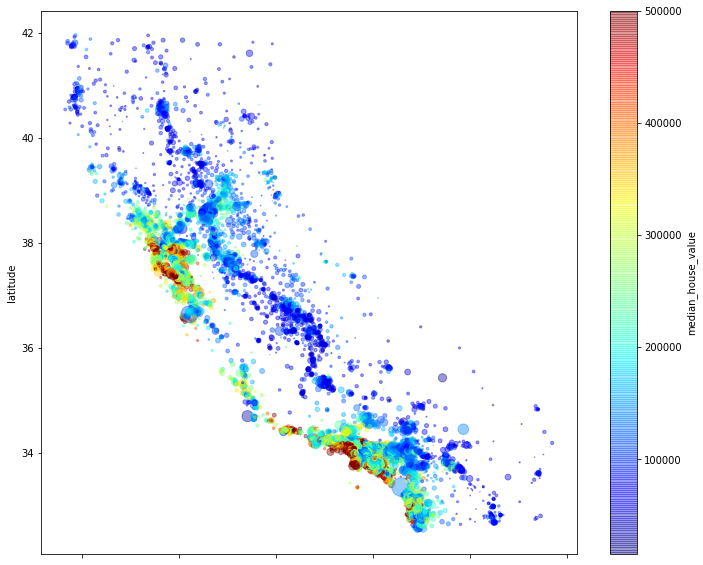

In [5]:
# See the geographical distribution of houses
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12,10), 
        alpha=0.4, s=df['population']/100, 
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

### Feature Engineering & Correlation with Target Variable

In [6]:
df['f1_median_income_category'] = np.ceil(df['median_income']/1.5)
df['f1_median_income_category'] = df['f1_median_income_category'].apply(lambda x: x if x<=5.0 else 5.0)
df['f2_rooms_per_houshold'] = df['total_rooms']/df['households']
df['f3_bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['f4_population_per_houshold'] = df['population']/df['households']
print(df.corr()['median_house_value'])

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049686
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
f1_median_income_category     0.643892
f2_rooms_per_houshold         0.151948
f3_bedrooms_per_room         -0.255880
f4_population_per_houshold   -0.023737
Name: median_house_value, dtype: float64


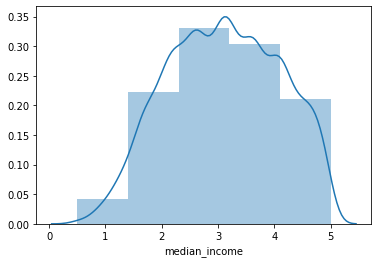

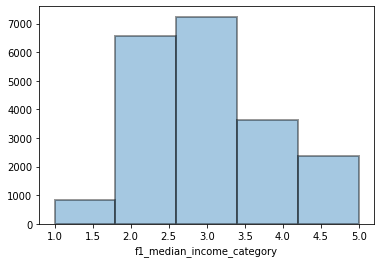

In [10]:
sns.distplot(df[df['median_income']<=5]['median_income'], bins=5)
plt.show()
sns.distplot(df['f1_median_income_category'], bins=5, kde=False,
            hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

In [8]:
# Stratified train-test-split based on median_income_category
shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
df_splits = list(shuffle_split.split(df, df['f1_median_income_category']))[0]
df_train = df.iloc[df_splits[0]].copy()
df_test = df.iloc[df_splits[1]].copy()

In [9]:
# Testing
mic_universe = df['f1_median_income_category'].value_counts()/len(df)
mic_train = df_train['f1_median_income_category'].value_counts()/len(df_train)
mic_test = df_test['f1_median_income_category'].value_counts()/len(df_test)
display(pd.DataFrame({'universe' : mic_universe, 'train' : mic_train, 'test' :mic_test}).sort_index())

,universe,train,test
1.0,0.039826,0.039850,0.039729
2.0,0.318847,0.318859,0.318798
3.0,0.350581,0.350594,0.350533
4.0,0.176308,0.176296,0.176357
5.0,0.114438,0.114402,0.114583
